In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
g_ryong_df0= pd.read_csv("지역별데이터셋/TRAIN_AWS_Preprocessing 2/계룡0년_aws.csv")
g_ryong_df1= pd.read_csv("지역별데이터셋/TRAIN_AWS_Preprocessing 2/계룡1년_aws.csv")
g_ryong_df2= pd.read_csv("지역별데이터셋/TRAIN_AWS_Preprocessing 2/계룡2년_aws.csv")
g_ryong_df3= pd.read_csv("지역별데이터셋/TRAIN_AWS_Preprocessing 2/계룡3년_aws.csv")

In [ ]:
#g_ryong_df0=g_ryong_df0.drop(["Unnamed: 0","지점","연도"],axis=1)

In [21]:
g_ryong_df0

,Unnamed: 0,연도,일시,지점,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%)
0,0,0,01-01 00:00,계룡,0.154818,0.410833,0.033248,0.0,0.830
1,1,0,01-01 01:00,계룡,0.142180,0.148611,0.030691,0.0,0.853
2,2,0,01-01 02:00,계룡,0.173776,0.203889,0.040921,0.0,0.802
3,3,0,01-01 03:00,계룡,0.169036,0.330556,0.048593,0.0,0.816
4,4,0,01-01 04:00,계룡,0.169036,0.000000,0.007673,0.0,0.827
...,...,...,...,...,...,...,...,...,...
8755,8755,0,12-31 19:00,계룡,0.399684,0.426389,0.012788,0.0,0.558
8756,8756,0,12-31 20:00,계룡,0.393365,0.000000,0.000000,0.0,0.588
8757,8757,0,12-31 21:00,계룡,0.390205,0.000000,0.000000,0.0,0.615
8758,8758,0,12-31 22:00,계룡,0.387046,0.000000,0.000000,0.0,0.618


In [ ]:
# plt.rcParams['font.family']="AppleGothic"
# plt.figure(figsize=(20,10))  #그래프 크기조절하고
# plt.plot(g_ryong_df0["일시"],g_ryong_df0["풍향(deg)"])
# plt.xlabel("일시")
# plt.ylabel("풍향")
# plt.title("일시에 따른 풍향")

# plt.show()

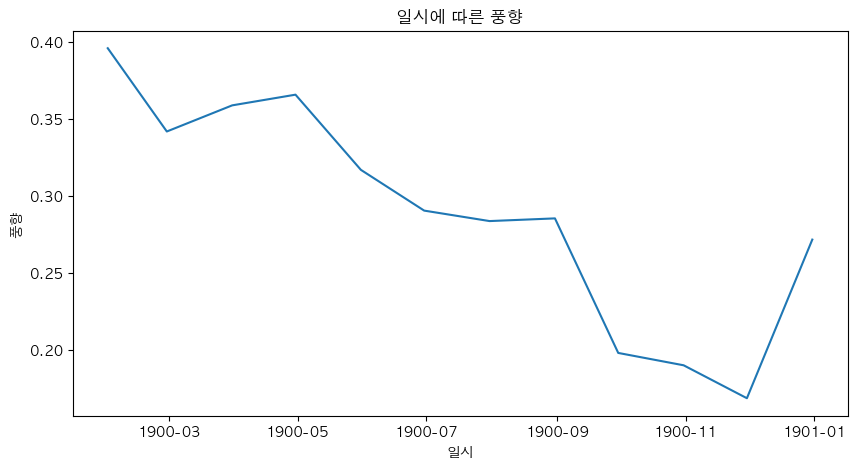

In [24]:
plt.rcParams['font.family']="AppleGothic"
g_ryong_df0["일시"]= pd.to_datetime(g_ryong_df0["일시"],format="%m-%d %H:%M")

#월별 데이터를 그룹
g_ryong_df0_a= g_ryong_df0.set_index('일시')
monthly_mean= g_ryong_df0_a["풍향(deg)"].resample("M").mean()

#그림그리기
plt.figure(figsize=(10,5))  #그래프 크기조절하고
plt.plot(monthly_mean.index,monthly_mean)
plt.xlabel("일시")
plt.ylabel("풍향")
plt.title("일시에 따른 풍향")

plt.show()

#  0 1 2 년차의 풍향을 보면 풍향은 매년 달라진다


In [25]:
plt.rcParams['font.family']="AppleGothic"
g_ryong_df0["일시"]= pd.to_datetime(g_ryong_df0["일시"],format="%m-%d %H:%M")

#월별 데이터를 그룹
g_ryong_df1_a= g_ryong_df1.set_index('일시')
monthly_mean= g_ryong_df1_a["풍향(deg)"].resample("M").mean()

#그림그리기
plt.figure(figsize=(10,5))  #그래프 크기조절하고
plt.plot(monthly_mean.index,monthly_mean)
plt.xlabel("일시")
plt.ylabel("풍향")
plt.title("일시에 따른 풍향")

plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

ValueError: time data "01-01 00:00" doesn't match format "%Y-%m-%d %H:%M", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

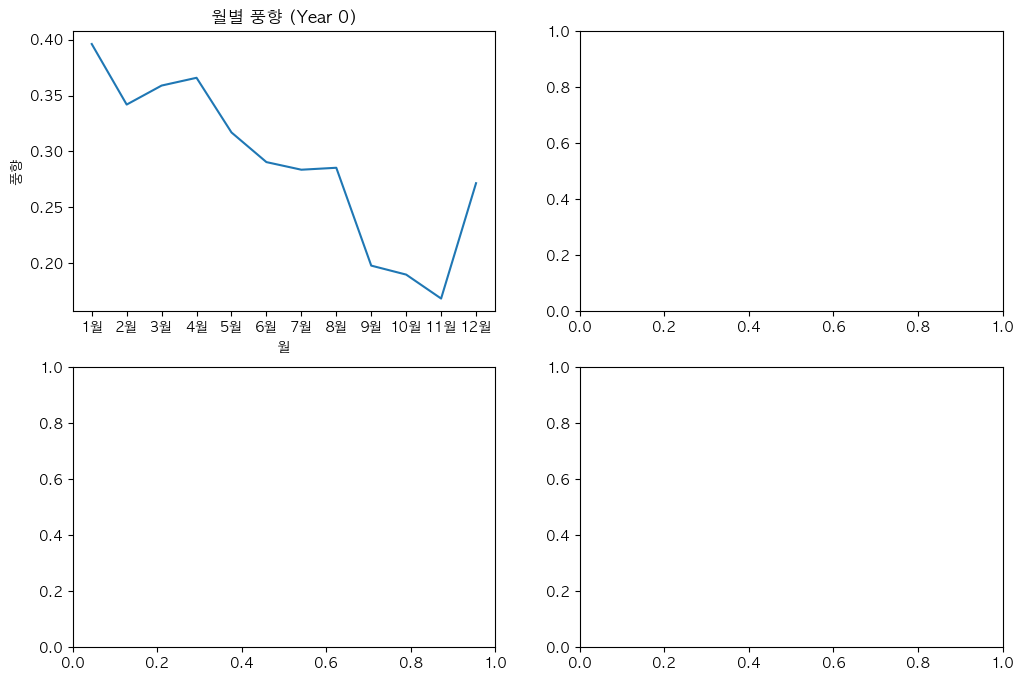

In [16]:

import numpy as np

# 2행 2열의 서브플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()  # 1차원 배열로 변경

# 각각의 플롯에 데이터 적용
for i, df in enumerate([g_ryong_df0, g_ryong_df1,g_ryong_df2, g_ryong_df3]):
    df["일시"] = pd.to_datetime(df["일시"], format="%Y-%m-%d %H:%M")
    df["월"] = df["일시"].dt.month
    monthly_mean = df.groupby("월")["풍향(deg)"].mean()
    axes[i].plot(monthly_mean.index, monthly_mean)
    axes[i].set_xticks(np.arange(1, 13))
    axes[i].set_xticklabels(["1월", "2월", "3월", "4월", "5월", "6월", "7월", "8월", "9월", "10월", "11월", "12월"])
    axes[i].set_xlabel("월")
    axes[i].set_ylabel("풍향")
    axes[i].set_title(f"월별 풍향 (Year {i})")

plt.tight_layout()  # 서브플롯간 간격 자동 조정
plt.show()

# 그러면 온도의 변화를 볼까?

TypeError: can only concatenate str (not "DatetimeArray") to str

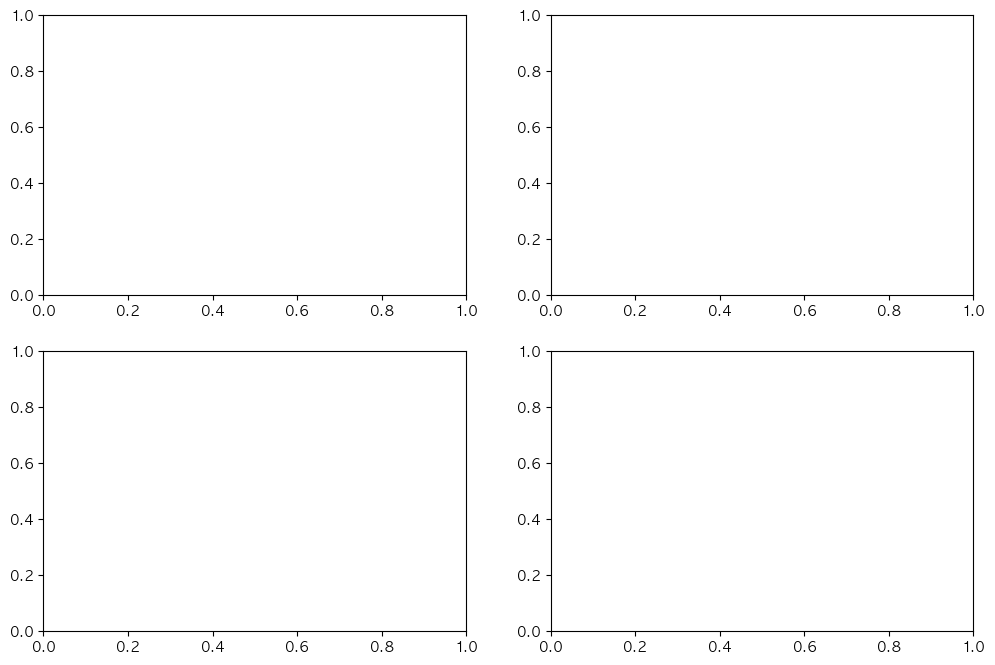

In [17]:
# 2행 2열의 서브플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()  # 1차원 배열로 변경

# 각각의 플롯에 데이터 적용
for i, df in enumerate([g_ryong_df0, g_ryong_df1, g_ryong_df2, g_ryong_df3]):
    df_copy = df.copy()  # 원본 데이터 복사
    df_copy["일시"] = pd.to_datetime("2000-" + df_copy["일시"], format="%Y-%m-%d %H:%M")
    df_copy["월"] = df_copy["일시"].dt.month
    monthly_mean = df_copy.groupby("월")["풍향(deg)"].mean()
    axes[i].plot(monthly_mean.index, monthly_mean)
    axes[i].set_xticks(np.arange(1, 13))
    axes[i].set_xticklabels(["1월", "2월", "3월", "4월", "5월", "6월", "7월", "8월", "9월", "10월", "11월", "12월"])
    axes[i].set_xlabel("월")
    axes[i].set_ylabel("풍향")
    axes[i].set_title(f"월별 풍향 (Year {i})")
plt.tight_layout()  # 서브플롯간 간격 자동 조정
plt.show()


In [ ]:
dataframes = [g_ryong_df0, g_ryong_df1, g_ryong_df4]

for i, df in enumerate(dataframes):
    df["일시"] = pd.to_datetime("2000-" + df["일시"], format="%Y-%m-%d %H:%M")
    df["월"] = df["일시"].dt.month
    monthly_stats = df.groupby("월")["풍향(deg)"].describe()
    print(f"계롱 {i+1} 통계:\n{monthly_stats}\n")


In [ ]:
import pandas as pd

dataframes = [g_ryong_df0, g_ryong_df1, g_ryong_df4]
stats_list = []

for i, df in enumerate(dataframes):
    df["일시"] = pd.to_datetime("2000-" + df["일시"], format="%Y-%m-%d %H:%M")
    df["월"] = df["일시"].dt.month
    monthly_stats = df.groupby("월")["풍향(deg)"].describe()
    monthly_stats.columns = [f"{col}_계롱{i+1}" for col in monthly_stats.columns]
    stats_list.append(monthly_stats)

combined_stats = pd.concat(stats_list, axis=1)
combined_stats

In [ ]:
g_ryong_df0.info()

In [ ]:
# def read_and_compute_yearly_mean(filename):
#     #파일을 읽습니다
#     data = pd.read_csv(filename)
    
#     #일시 열의 값을 datatime 형식으로 변환시킨다
#     data["일시"] = pd.to_datetime(data["일시"], format="%m-%d %H:%M")
    
#     #연도별로 데이터를 그룹화 하고 평균값을 계산
#     monthly_mean = data.groupby(data['일시'].dt.to_period('M')).mean()
                              
#     return monthly_mean

In [ ]:
# filnames = [g_ryong_df0,g_ryong_df1,g_ryong_df2,g_ryong_df3]

In [ ]:
g_ryong_dfs=[g_ryong_df0,g_ryong_df1,g_ryong_df2,g_ryong_df3]

for df in g_ryong_dfs:
    df["일시"]= pd.to_datetime(df["일시"],format="%m-%d %H:%M")

In [ ]:
monthly_means = [g.groupby(g['일시'].dt.to_period('M')).mean() 
                 for g in [g_ryong_df0, g_ryong_df2, g_ryong_df3, g_ryong_df4]]